In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
pd.options.display.float_format = "{:.2f}".format
%reload_ext nb_black
from matplotlib import cm

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
reviews = pd.read_csv("Wine\winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.00,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.00,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.00,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


### Bar charts/Categorical Data - The simplest way to data visualization. 
They map categories to numbers: 
* wine-producing provinces of the world (category) 
    * to the number of labels of wines they produce (number):

In [5]:
reviews.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [7]:
reviews['province'].value_counts().sort_values(ascending=False).head(5)

California        44508
Washington         9750
Tuscany            7281
Bordeaux           6111
Northern Spain     4892
Name: province, dtype: int64

In [91]:
province_counts/len(reviews)

province
California       0.29
Washington       0.06
Tuscany          0.05
Bordeaux         0.04
Northern Spain   0.03
Name: province, dtype: float64

In [68]:
import random
def random_color():
    levels = range(32,256,32)
    return tuple(random.choice(levels) for _ in range(3))

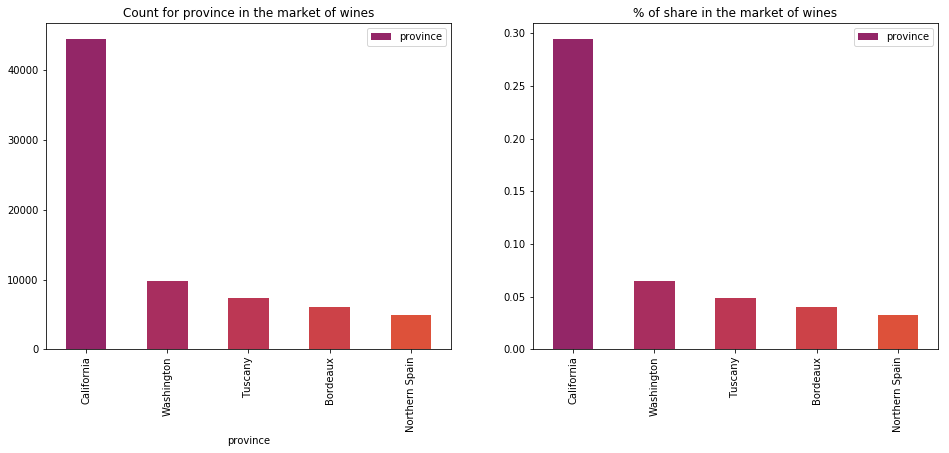

In [96]:
#plt.figure(figsize=(12,6))
f,ax=plt.subplots(1,2,figsize=(16,6))
color = cm.inferno(np.linspace(.4,.6, 5))
province_counts = reviews.groupby('province')['province'].count().sort_values(ascending=False)
province_counts = province_counts[:5]
province_counts.plot(kind='bar',color=color,legend='Province',ax=ax[0]).set_title('Count for province in the market of wines')
province_counts_pct = province_counts/len(reviews)
province_counts_pct.plot(kind='bar',color=color,legend='Province',ax=ax[1]).set_title('% of share in the market of wines')
plt.xlabel('');

#### Looking on barchart above we can see that TOP 5 Province which produces the most wine in the world are:   : 
* California        44508 -> 29%
* Washington         9750 -> 6%
* Tuscany            7281 -> 5%
* Bordeaux           6111 -> 4%
* Northern Spain     4892 -> 3%

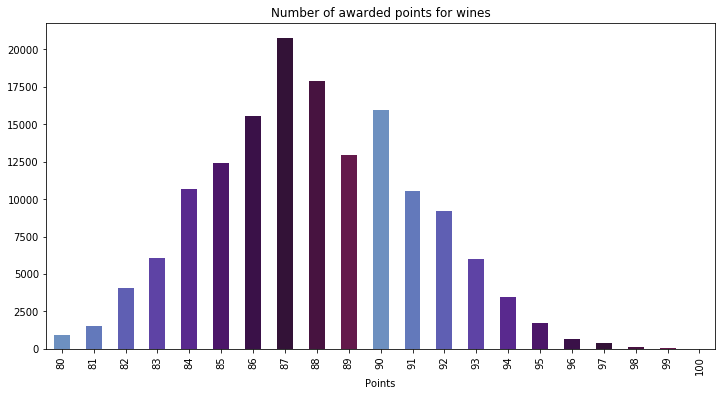

In [109]:
plt.figure(figsize=(12,6))
c2 = cm.twilight(np.linspace(.2,.6, 10))
reviews['points'].value_counts().sort_index().plot(kind='bar',color=c2).set_title('Number of awarded points for wines');
plt.xlabel('Points');

We can see on the chart above that there 85-90 points are most common ratings for wines.

In [139]:
def wine(price):
    if price > 0 and price <= 20:
        return '0-20'
    elif price >20 and price <=40:
        return '21-40'
    elif price >40 and price <=80:
        return '41-80'
    elif price >80 and price <=150:
        return '81-150' 
    else:
        return '>150'
reviews['PriceBand'] = reviews['price'].apply(wine)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,PriceBand
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.00,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,>150
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.00,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,81-150
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.00,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,81-150


In [140]:
pricebands = reviews.groupby('PriceBand')['points'].count()
pricebands=pricebands.reset_index()
pricebands = pricebands.sort_values(by='PriceBand')

In [160]:
pb_pct = reviews.groupby('PriceBand')['points'].count()/len(reviews)
pb_pct = pb_pct.reset_index()

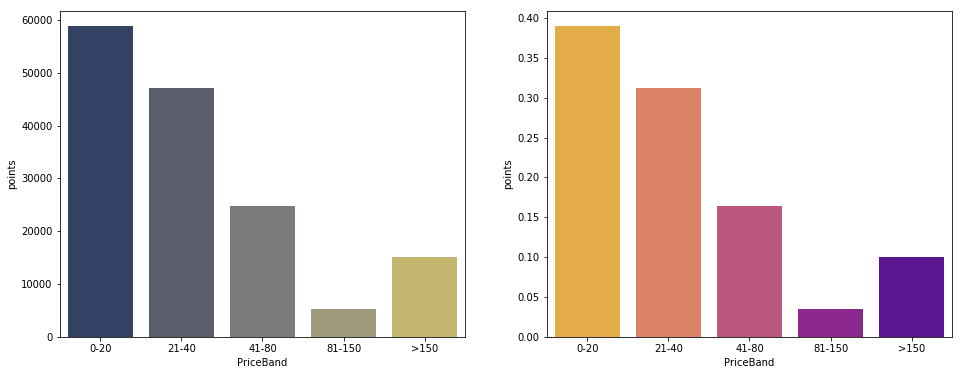

In [162]:
f,ax=plt.subplots(1,2,figsize=(16,6))
sns.barplot(data=pricebands,y='points',x='PriceBand',palette='cividis',ax=ax[0])
sns.barplot(data=pb_pct,y='points',x='PriceBand',palette='plasma_r',ax=ax[1]);

We can see on the chart above that most of wines are in under 100 USD. The biggest group almost 40% are wines under 20 USD.
So we can check histogram of prices under 100

Text(0.5, 1.0, 'Histogram of price under 150')

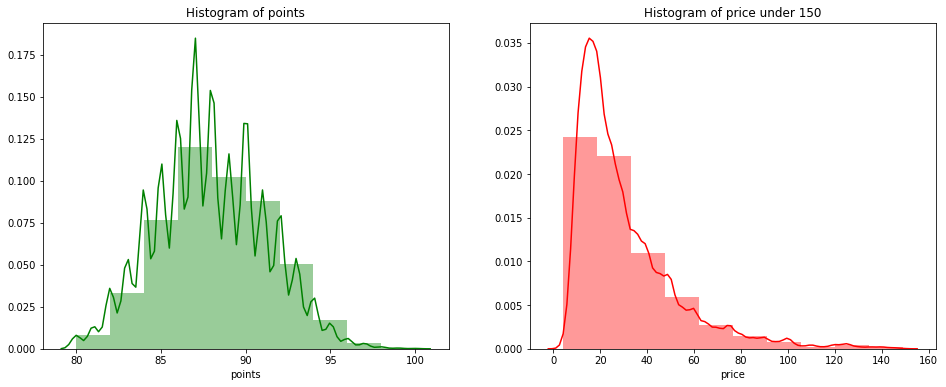

In [192]:
f,ax = plt.subplots(1,2,figsize=(16,6))
d1 = reviews['points']
sns.distplot(d1,ax=ax[0],bins=10,color='g').set_title('Histogram of points')
d2 = reviews[reviews['price'] < 150]['price']
sns.distplot(d2,ax=ax[1],bins=10,color='r').set_title('Histogram of price under 150')

We can see on histograms above that most of wines are rated in 85-93 points, and also most of prices are between 5-30 USD 

In [204]:
top_countries = reviews.groupby('country')['country'].count().sort_values(ascending=False).head(10)
top_countries = pd.DataFrame(top_countries)
top_countries = top_countries.rename(columns={'country':'count'})

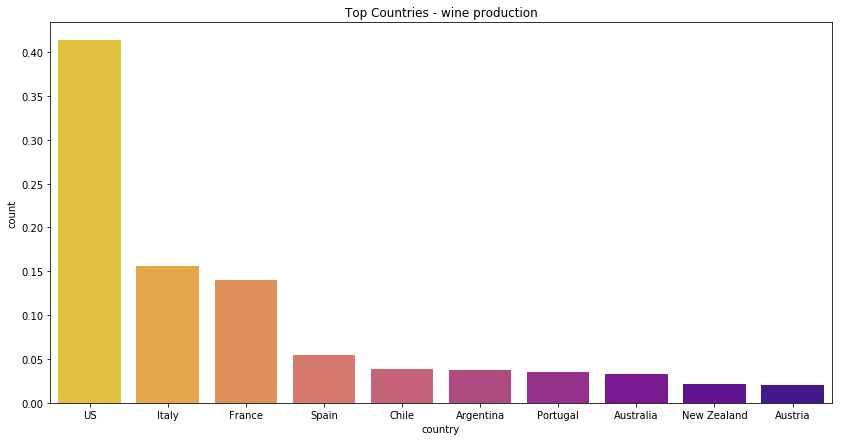

In [223]:
plt.figure(figsize=(14,7))
sns.barplot(data=top_countries/len(reviews),y='count',x=top_countries.index,palette='plasma_r').set_title('Top Countries - wine production');

In [247]:
wines_var = reviews.groupby('variety')['variety'].count().sort_values(ascending=False).head(20)
wines_var = pd.DataFrame(wines_var)
wines_var = wines_var.rename(columns={'variety':'counts'})

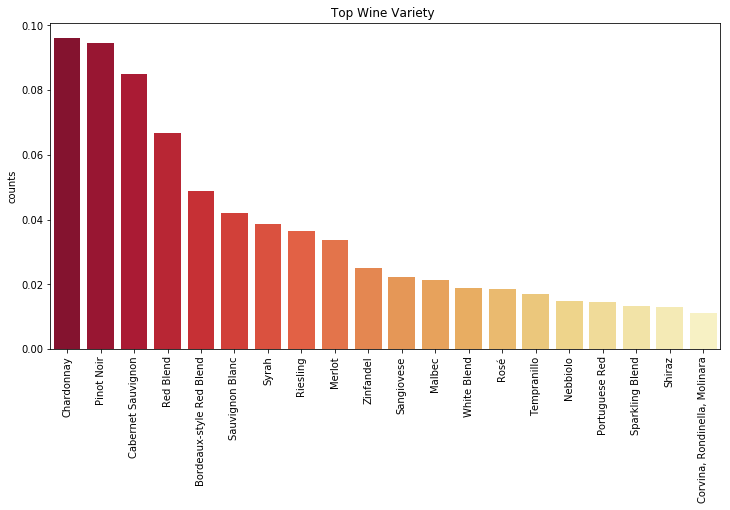

In [249]:
plt.figure(figsize=(12,6))
sns.barplot(data=wines_var/len(reviews),y='counts',x=wines_var.index,palette='YlOrRd_r').set_title('Top Wine Variety ');
plt.xticks(rotation=90)
plt.xlabel('');

On a chart above we can see that most of wines are variety of : Chardonnay, Pinot Noir, Cabernet Sauvignon, Red Blend and Bordeaux-style Red Blend. These 5 varieties stand almost 40% of all wines.
* Chardonnay:	__14482__
* Pinot Noir:	__14291__
* Cabernet Sauvignon:	__12800__
* Red Blend:	__10062__
* Bordeaux-style Red Blend:	__7347__

In [269]:
var_price = reviews.groupby('variety')['price'].agg(['mean','std','count']).sort_values(by='count',ascending=False).head(10)
var_price = var_price.reset_index()
var_price

,variety,mean,std,count
0,Chardonnay,32.25,45.15,13775
1,Pinot Noir,44.08,33.39,13628
2,Cabernet Sauvignon,42.15,35.25,12671
3,Red Blend,35.56,30.43,9378
4,Sauvignon Blanc,18.62,9.54,6054
5,Syrah,36.71,33.48,5667
6,Riesling,29.62,40.09,5212
7,Merlot,27.33,33.88,4987
8,Bordeaux-style Red Blend,49.16,72.68,4545
9,Zinfandel,26.78,11.24,3794


''

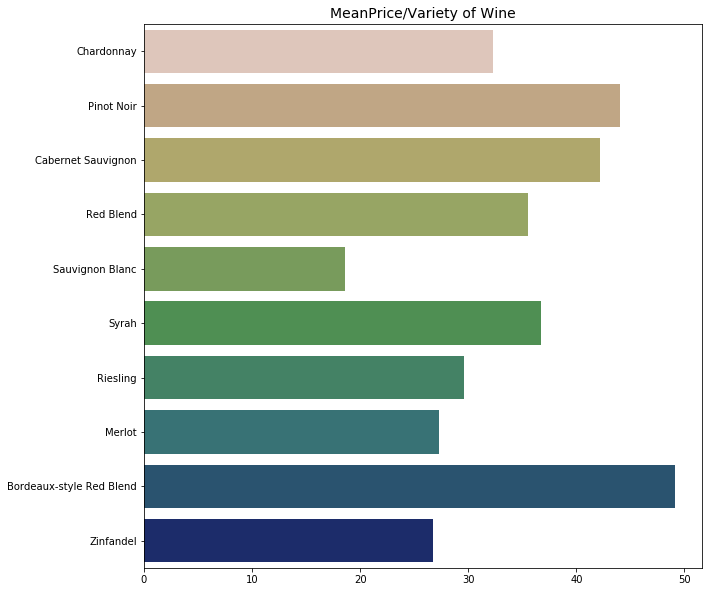

In [292]:
plt.figure(figsize=(10,10))
sns.barplot(data=var_pric,x='mean',y='variety',palette='gist_earth_r').set_title('MeanPrice/Variety of Wine',fontsize=14);
plt.xlabel('')
plt.ylabel('')
;

In [296]:
#var_price[['variety','mean']].set_index('variety').head(5)

We can see on the chart above that mean prices are:
* Chardonnay	__32.25 USD__
* Pinot Noir	__44.08 USD__
* Cabernet Sauvignon	__42.15 USD__
* Red Blend	__35.56 USD__
* Sauvignon Blanc	__18.62 USD__
    

In [301]:
#winery
winery_g = reviews.groupby(['country','winery'])['price'].agg(['mean','std','count']).sort_values(by='count',ascending=False).head(10)
winery_g = winery_g.reset_index()
winery_g

,country,winery,mean,std,count
0,US,Williams Selyem,56.97,16.83,371
1,US,Testarossa,48.60,11.86,274
2,Portugal,DFJ Vinhos,9.99,3.00,249
3,US,Chateau Ste. Michelle,22.58,12.19,225
4,US,Columbia Crest,16.63,9.60,216
5,US,Kendall-Jackson,29.52,24.27,216
6,Chile,Concha y Toro,28.39,29.10,214
7,Argentina,Trapiche,23.56,18.37,201
8,France,Bouchard Père & Fils,121.12,143.75,192
9,US,De Loach,33.21,12.25,189


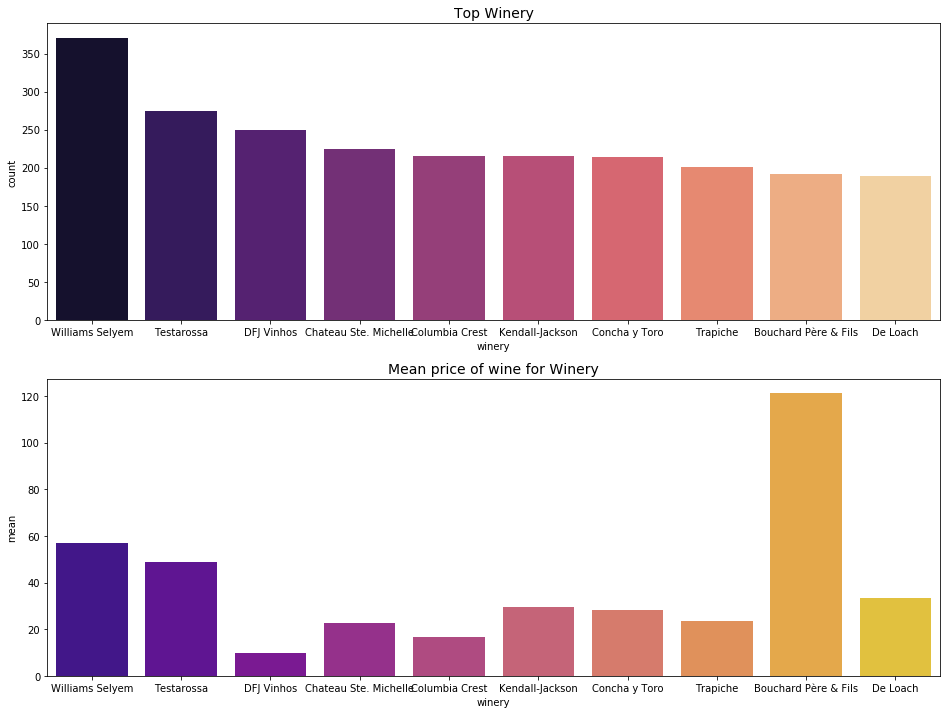

In [321]:
f,ax = plt.subplots(2,1,figsize=(16,12))
sns.barplot(data=winery_g,y='count',x='winery',palette='magma',ax=ax[0]).set_title('Top Winery',fontsize=14);
sns.barplot(data=winery_g,y='mean',x='winery',palette='plasma',ax=ax[1]).set_title('Mean price of wine for Winery',fontsize=14);

In [323]:
winery_p = reviews.groupby(['country','winery'])['points'].agg(['mean','std','count']).sort_values(by='count',ascending=False).head(10)
winery_p = winery_p.reset_index()
#winery_p

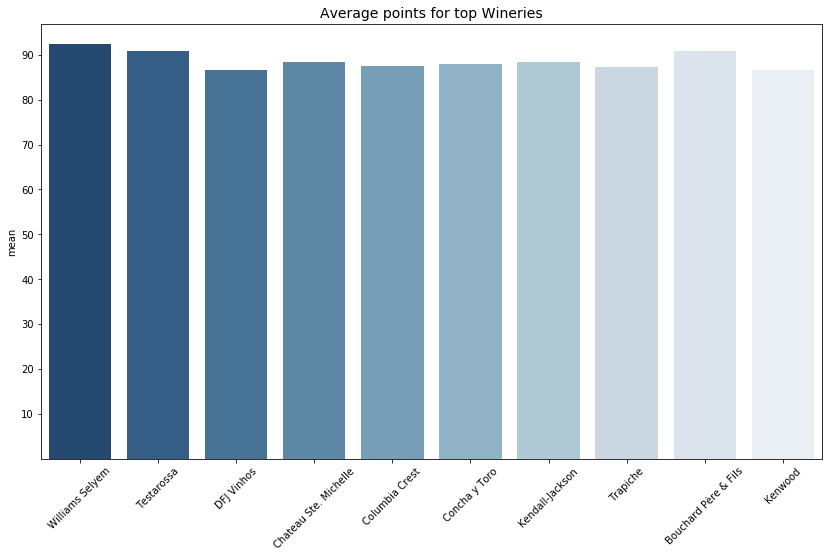

In [359]:
plt.figure(figsize=(14,8))
sns.barplot(data=winery_p,y='mean',x='winery',palette='Blues_r',dodge=False,saturation=0.55).set_title('Average points for top Wineries',fontsize=14);
plt.yticks([i for i in range(10,100,10)]);
plt.xlabel('');
plt.xticks(rotation=45);

We can see that almost every winery has average 90 points for their wines. 
* Mean of these top 10 wineries is __88,7 points__

## Insights
#### 